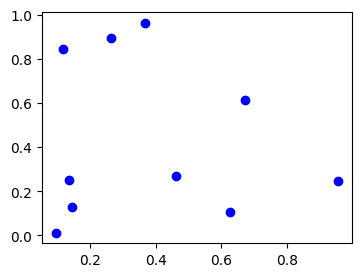

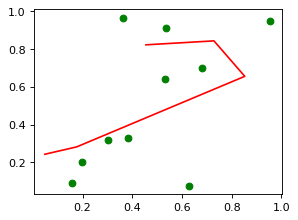

In [16]:
### 图像对象

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['STHeiti']
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(
    'A',
    figsize=(4, 3),
    dpi=80,
    facecolor='w',
    edgecolor='k',
)
plt.plot(np.random.rand(5), np.random.rand(5), color='r')

fig2 = plt.figure('B', figsize=(4, 3))
### 这里plt操作的将会是第二个figure。 fig B
plt.scatter(np.random.rand(10), np.random.rand(10), color='b')

## 执行这句代码,又切换回fig A
plt.figure('A')
plt.scatter(np.random.rand(10), np.random.rand(10), color='g')
plt.show()


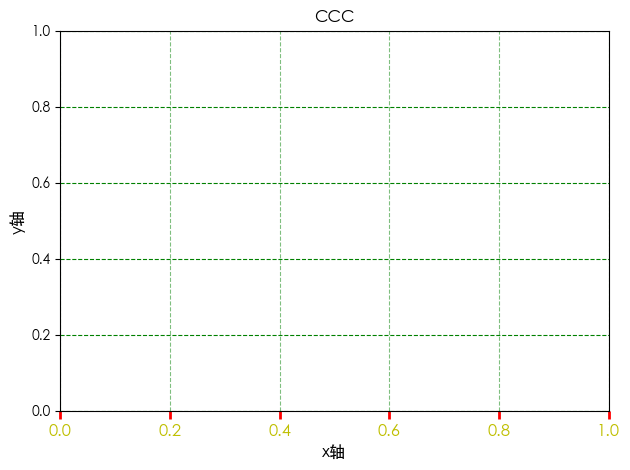

In [24]:
## 设置matplotlib的全局参数
#。https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams
plt.rcParams['font.sans-serif'] = ['STHeiti']
plt.rcParams['axes.unicode_minus'] = False

## 设置当前窗口参数
fig = plt.figure()

plt.title('CCC')
plt.xlabel('x轴', fontsize=12)
plt.ylabel('y轴', fontsize=12)
# 设置刻度参数
# plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='x', direction='out', length=6, width=2, colors='r',
               grid_color='r', grid_alpha=0.5, labelsize=12, labelcolor='y')

plt.grid(linestyle='--', color='g')
plt.tight_layout()
plt.show()

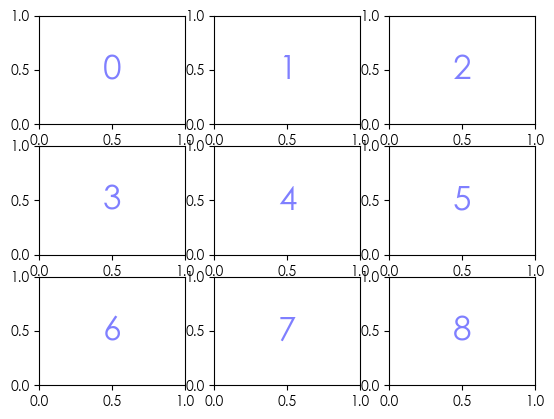

In [43]:

### 子图

## 矩阵式布局 -- 不适用于单元格合并的情况
fig = plt.figure("sub layout")

# for i in range(4):
#     ## row, col, num
#     axes = plt.subplot(2, 2, i+1)
#     plt.text(0.5, 0.5, "" + str(i))

for i in range(9):
    ## row, col, num
    axes = plt.subplot(331+i)
    plt.text(0.5, 0.5, "" + str(i),
             ha='center',
             va='center',
             fontsize=24,
             color='b',
             alpha=0.5,
             # transform=axes.transAxes
             )


plt.show()


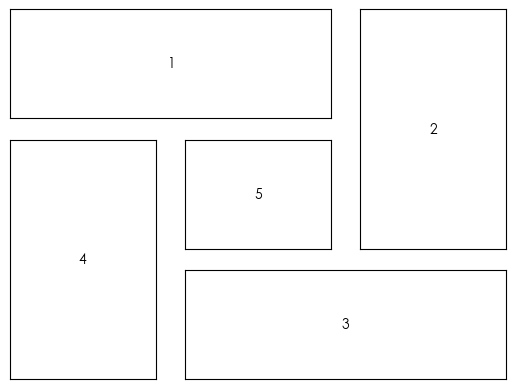

In [52]:
### 网格式布局 -- 支持单元格合并,适合有规律的网格布局

import matplotlib.gridspec as gs
plt.figure('Grid')
## 创建一个网格
gs = gs.GridSpec(3, 3)

## 根据网格,创建一个字图,放到figure中
plt.subplot(gs[0, :2])
plt.text(0.5, 0.5, "1", ha='center', va='center')
# plt.xticks([])
# plt.yticks([])
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.subplot(gs[:2, 2])
plt.text(0.5, 0.5, "2", ha='center', va='center')
plt.xticks([])
plt.yticks([])

plt.subplot(gs[2, 1:])
plt.text(0.5, 0.5, "3", ha='center', va='center')
plt.xticks([])
plt.yticks([])

plt.subplot(gs[1:3, 0])
plt.text(0.5, 0.5, "4", ha='center', va='center')
plt.xticks([])
plt.yticks([])

plt.subplot(gs[1, 1])
plt.text(0.5, 0.5, "5", ha='center', va='center')
plt.xticks([])
plt.yticks([])

plt.show()



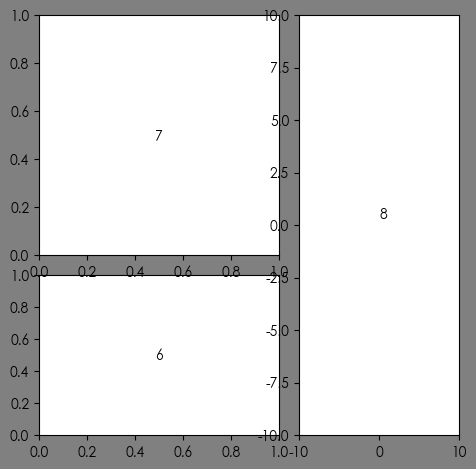

In [80]:
### 自由布局

fig = plt.figure('flow layout', figsize=(4, 4), facecolor='gray')

## 直接在原图上创建一个子图,并激活
# plt.axes((0.0, 0.0, 0.6, 0.4))
# plt.text(0.5, 0.5, "6", ha='center', va='center')
#
# plt.axes((0.0, 0.45, 0.6, 0.6))
# plt.text(0.5, 0.5, "7", ha='center', va='center')
#
# plt.axes((0.65, 0.0, 0.4, 1.05))
# plt.text(0.5, 0.5, "8", ha='center', va='center')

## 添加一个子图
ax1 = fig.add_axes([0.0, 0.0, 0.6, 0.4])
ax1.text(0.5, 0.5, "6", ha='center', va='center')

ax2 = fig.add_axes([0.0, 0.45, 0.6, 0.6])
ax2.text(0.5, 0.5, "7", ha='center', va='center')

ax3 = fig.add_axes([0.65, 0.0, 0.4, 1.05])
ax3.text(0.5, 0.5, "8", ha='center', va='center')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

在 Matplotlib 中，“自由布局”通常指的是不依赖默认的网格布局（如 `plt.subplots()` 生成的规则子图），而是手动控制子图（`Axes`）的位置和大小，从而实现更灵活的图表排列。Matplotlib 提供了几种方法来实现自由布局，包括 `add_axes()`、`GridSpec` 和 `InsetLocator` 等。以下通过表格和详细说明介绍如何实现自由布局。

---

### 表格：Matplotlib 自由布局的主要方法
| **方法**             | **功能**                                  | **示例**                              |
|----------------------|-------------------------------------------|---------------------------------------|
| `fig.add_axes()`     | 在图中手动添加子图，指定位置和大小        | `fig.add_axes([0.1, 0.1, 0.8, 0.8])` |
| `plt.axes()`         | 快速创建并激活一个子图                    | `plt.axes([0.2, 0.2, 0.3, 0.3])`     |
| `GridSpec`           | 使用网格系统自定义子图布局                | `gs = GridSpec(3, 3); ax = fig.add_subplot(gs[0, :])` |
| `InsetLocator`       | 在现有子图内添加嵌套子图                  | `inset_axes(ax, width=0.5, height=0.5)` |
| `axes.set_position()`| 调整已有子图的位置                        | `ax.set_position([0.5, 0.5, 0.4, 0.4])` |

---

### 详细说明

#### 1. **`fig.add_axes()`**
- **功能**：在 `Figure` 对象上手动添加一个 `Axes`，通过 `[left, bottom, width, height]` 指定位置和大小（单位为画布的相对坐标，0 到 1）。
- **示例**：
  ```python
  import matplotlib.pyplot as plt
  import numpy as np

  fig = plt.figure()
  ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # 大子图
  ax2 = fig.add_axes([0.6, 0.6, 0.3, 0.3])  # 小子图

  x = np.linspace(0, 10, 100)
  ax1.plot(x, np.sin(x), label='正弦')
  ax2.plot(x, np.cos(x), label='余弦')

  ax1.legend()
  ax2.legend()
  plt.show()
  ```
  - **效果**：一个大子图覆盖大部分区域，一个小子图位于右上角。

#### 2. **`plt.axes()`**
- **功能**：快速创建并激活一个子图，类似于 `add_axes()`，但直接作用于当前 `Figure`。
- **示例**：
  ```python
  import matplotlib.pyplot as plt
  import numpy as np

  x = np.linspace(0, 10, 100)
  plt.axes([0.1, 0.1, 0.4, 0.4])  # 左下子图
  plt.plot(x, np.sin(x))

  plt.axes([0.6, 0.6, 0.3, 0.3])  # 右上子图
  plt.plot(x, np.cos(x))

  plt.show()
  ```
  - **注意**：每次调用会切换当前活动的 `Axes`，适合简单布局。

#### 3. **`GridSpec`**
- **功能**：基于网格系统灵活定义子图，支持跨行或跨列的布局。
- **用法**：
  - 创建 `GridSpec` 对象，指定行数和列数。
  - 使用切片选择网格位置，添加子图。
- **示例**：
  ```python
  import matplotlib.pyplot as plt
  import matplotlib.gridspec as gridspec
  import numpy as np

  fig = plt.figure()
  gs = gridspec.GridSpec(3, 3)  # 3x3 网格

  ax1 = fig.add_subplot(gs[0, :])      # 第一行，跨所有列
  ax2 = fig.add_subplot(gs[1:, 0])     # 第二、三行，第一列
  ax3 = fig.add_subplot(gs[1, 1:])     # 第二行，第二、三列
  ax4 = fig.add_subplot(gs[2, 1])      # 第三行，第二列

  x = np.linspace(0, 10, 100)
  ax1.plot(x, np.sin(x))
  ax2.plot(x, np.cos(x))
  ax3.plot(x, np.tan(x))
  ax4.plot(x, x**2)

  plt.show()
  ```
  - **效果**：四个子图以非均匀方式排列，充分利用网格。

#### 4. **`InsetLocator`（嵌套子图）**
- **功能**：在已有 `Axes` 内添加嵌套子图，常用于放大细节。
- **用法**：需要导入 `mpl_toolkits.axes_grid1.inset_locator`。
- **示例**：
  ```python
  from mpl_toolkits.axes_grid1.inset_locator import inset_axes
  import matplotlib.pyplot as plt
  import numpy as np

  fig, ax = plt.subplots()
  x = np.linspace(0, 10, 100)
  ax.plot(x, np.sin(x))

  # 在主图内添加嵌套子图
  axins = inset_axes(ax, width=1.5, height=1.5, loc='upper right')
  axins.plot(x, np.cos(x))
  axins.set_xlim(0, 2)  # 放大局部
  axins.set_ylim(-1, 1)

  plt.show()
  ```
  - **效果**：主图显示正弦曲线，右上角嵌套子图显示余弦曲线的局部放大。

#### 5. **`axes.set_position()`**
- **功能**：调整已有 `Axes` 的位置，常用于微调。
- **示例**：
  ```python
  import matplotlib.pyplot as plt
  import numpy as np

  fig, ax = plt.subplots()
  x = np.linspace(0, 10, 100)
  ax.plot(x, np.sin(x))

  # 调整位置
  ax.set_position([0.2, 0.2, 0.6, 0.6])

  plt.show()
  ```

---

### 注意事项
1. **坐标单位**：
   - `[left, bottom, width, height]` 使用相对坐标（0 到 1），基于画布尺寸。
2. **重叠问题**：
   - 手动布局可能导致子图重叠，需仔细调整位置和大小。
3. **布局调整**：
   - 使用 `plt.tight_layout()` 或 `fig.subplots_adjust()` 优化间距，但对自由布局效果有限。
4. **复杂布局**：
   - `GridSpec` 适合半结构化自由布局，`add_axes()` 适合完全自由布局。

---

### 综合示例：自由布局
```python
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

fig = plt.figure(figsize=(10, 6))

# 手动添加子图
ax1 = fig.add_axes([0.1, 0.1, 0.4, 0.4])  # 左下
ax2 = fig.add_axes([0.6, 0.6, 0.3, 0.3])  # 右上

# 使用 GridSpec 添加子图
gs = gridspec.GridSpec(2, 2)
ax3 = fig.add_subplot(gs[0, 0])  # 网格左上

x = np.linspace(0, 10, 100)
ax1.plot(x, np.sin(x), label='Sin')
ax2.plot(x, np.cos(x), label='Cos')
ax3.plot(x, np.tan(x), label='Tan')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()
```
- **效果**：三个子图以自由方式排列，位置和大小各异。

---

### 总结
- **`fig.add_axes()`**：完全手动控制子图位置。
- **`GridSpec`**：基于网格的灵活布局。
- **`InsetLocator`**：嵌套子图，适合局部放大。
- 根据需求选择：简单调整用 `add_axes()`，复杂结构用 `GridSpec`。

如果你有具体的自由布局需求（比如“三个子图呈三角形排列”），可以告诉我，我帮你写代码！